In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


1. Import des librairies et chargement
2. Explication
import pandas as pd : importe la librairie pandas et lui donne le raccourci pd pour manipuler des tableaux de données (DataFrame).

import numpy as np : importe numpy, utile pour des calculs numériques (log, vecteurs, etc.).

import matplotlib.pyplot as plt : importe matplotlib pour faire des graphiques de base.

import seaborn as sns : importe seaborn, une surcouche de matplotlib avec des graphiques plus jolis.

sns.set(style="whitegrid") : définit un style graphique global (fond blanc avec grille).

df = pd.read_csv("train.csv") : lit le fichier CSV train.csv et le charge dans un DataFrame df.​

In [45]:
# Importation de la bibliothèque pandas
# Utilisée pour la manipulation et l’analyse des données (DataFrame, CSV, etc.)
import pandas as pd

# Importation de numpy
# Utilisée pour les calculs numériques et la manipulation des tableaux
import numpy as np

# Importation de matplotlib.pyplot
# Bibliothèque de base pour la visualisation des données (graphiques)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
# Importation de seaborn
# Bibliothèque de visualisation statistique basée sur matplotlib (graphiques plus esthétiques)
import seaborn as sns

# Configuration du style graphique de seaborn
# "whitegrid" ajoute une grille blanche en arrière-plan pour améliorer la lisibilité
sns.set(style="whitegrid")

# Chargement du fichier CSV Titanic depuis le dossier Kaggle
# Le fichier est lu et stocké dans un DataFrame pandas appelé df
df = pd.read_csv("/kaggle/input/titanic/train.csv")


2. Aperçu général et valeurs manquantes
3. Explication
print(df.head()) : affiche les 5 premières lignes pour voir la structure des données.

print(df.info()) : affiche les types des colonnes et le nombre de valeurs non nulles.

print(df.describe()) : affiche les statistiques descriptives des colonnes numériques (moyenne, médiane, etc.).

na_counts = df.isna().sum() : calcule, pour chaque colonne, le nombre de valeurs manquantes (NaN).

na_percent = df.isna().mean() * 100 : calcule, pour chaque colonne, le pourcentage de valeurs manquantes.

missing_table = pd.DataFrame({...}) : construit un DataFrame avec deux colonnes :

"nb_na" : nombre de valeurs manquantes.

"pct_na" : pourcentage de valeurs manquantes arrondi à 2 décimales.

.sort_values("pct_na", ascending=False) : trie les variables par pourcentage de NA décroissant.

print(missing_table) : affiche le tableau des valeurs manquantes.

plt.figure(figsize=(8,4)) : crée une nouvelle figure de taille 8×4.

sns.barplot(x=missing_table.index, y="pct_na", data=missing_table) : crée un barplot avec en abscisse les noms de colonnes et en ordonnée le pourcentage de NA.

plt.xticks(rotation=45) : incline les noms de colonnes à 45° pour mieux les lire.

plt.ylabel("Pourcentage de valeurs manquantes (%)") : nomme l’axe des y.

plt.title("Valeurs manquantes par variable") : ajoute un titre au graphique.

plt.tight_layout() : ajuste les marges du graphique pour que tout soit visible.

plt.show() : affiche le graphique.​

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

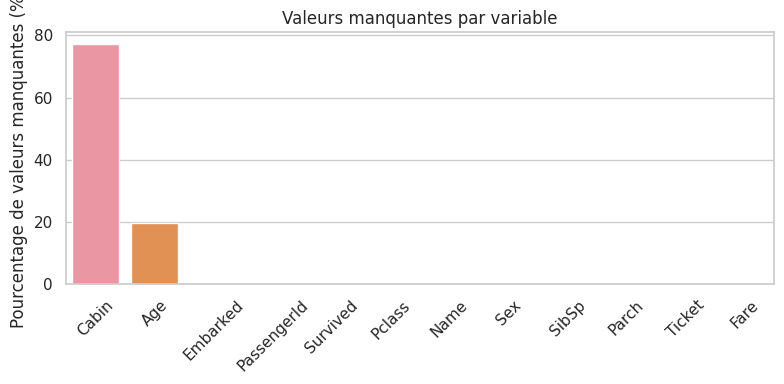

In [22]:
# Aperçu
print(df.head())
print(df.info())
print(df.describe())

# Tableau des NA
na_counts = df.isna().sum()
na_percent = df.isna().mean() * 100
missing_table = pd.DataFrame({
    "nb_na": na_counts,
    "pct_na": na_percent.round(2)
}).sort_values("pct_na", ascending=False)
print(missing_table)

# Barplot des pourcentages de NA
plt.figure(figsize=(8,4))
sns.barplot(x=missing_table.index, y="pct_na", data=missing_table)
plt.xticks(rotation=45)
plt.ylabel("Pourcentage de valeurs manquantes (%)")
plt.title("Valeurs manquantes par variable")
plt.tight_layout()
plt.show()


3. Descriptives univariées
4. Explication
num_cols = ["Age", "SibSp", "Parch", "Fare"] : liste des colonnes numériques que l’on veut décrire.

print(df[num_cols].describe()) : affiche les stats descriptives pour ces variables numériques.

cat_cols = ["Survived", "Pclass", "Sex", "Embarked", "Cabin"] : liste des variables qualitatives.

for col in cat_cols: : boucle sur chaque variable catégorielle.

print(f"\nFréquences pour {col}:") : affiche un titre pour la variable.

print(df[col].value_counts(dropna=False)) : affiche les effectifs de chaque modalité (en incluant NaN).

print(df[col].value_counts(normalize=True, dropna=False).round(3)) : affiche les fréquences relatives (proportions) arrondies à 3 décimales.

for col in num_cols: : boucle sur chaque variable numérique.

plt.figure(figsize=(6,4)) : nouvelle figure pour chaque histogramme.

sns.histplot(df[col], kde=True) : histogramme de la variable avec courbe de densité (kde).

plt.title(f"Distribution de {col}") : titre avec le nom de la variable.

plt.tight_layout() puis plt.show() : mise en page et affichage du graphique.

for col in ["Survived", "Pclass", "Sex", "Embarked"]: : boucle sur les principales variables qualitatives.

sns.countplot(data=df, x=col) : barplot du nombre d’observations dans chaque catégorie.​



              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200

Fréquences pour Survived:
Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616
1    0.384
Name: proportion, dtype: float64

Fréquences pour Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Pclass
3    0.551
1    0.242
2    0.207
Name: proportion, dtype: float64

Fréquences pour Sex:
Sex
male      577
female    314
Name: count, dtype: int64
Sex
male      0.648
female    0.352
Name: proportion, dtype: float64

Fréquences pour Embarked:
Embarked
S      644
C      168
Q    

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


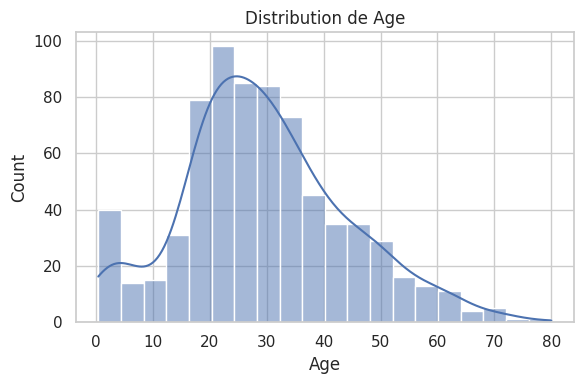

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


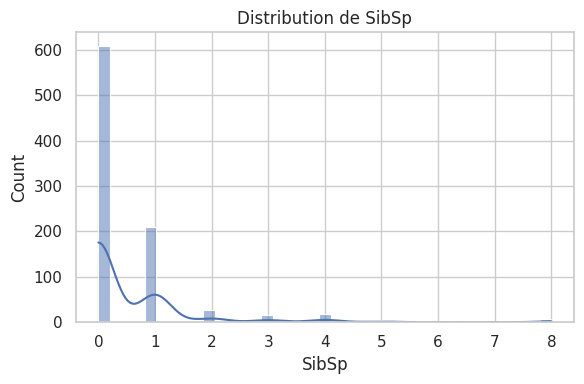

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


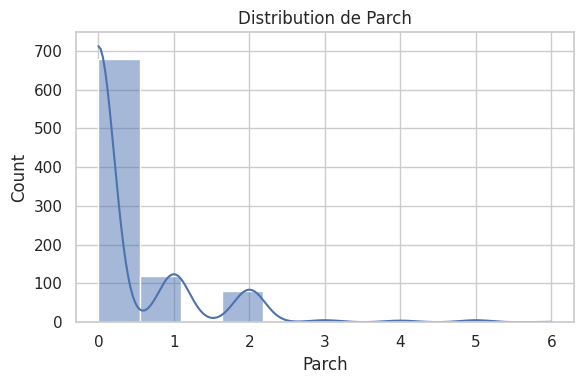

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


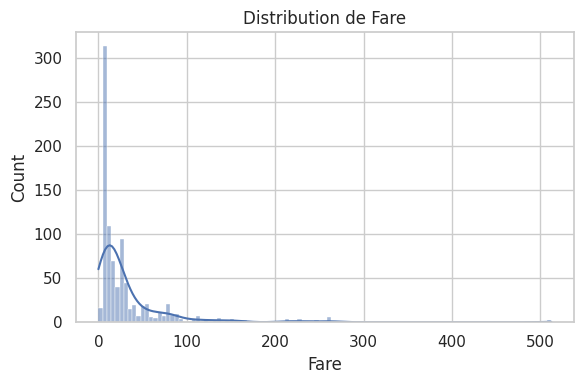

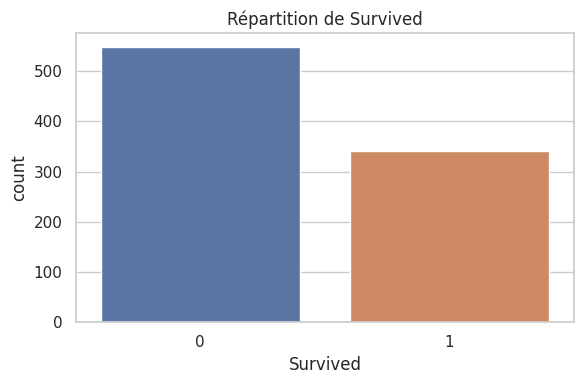

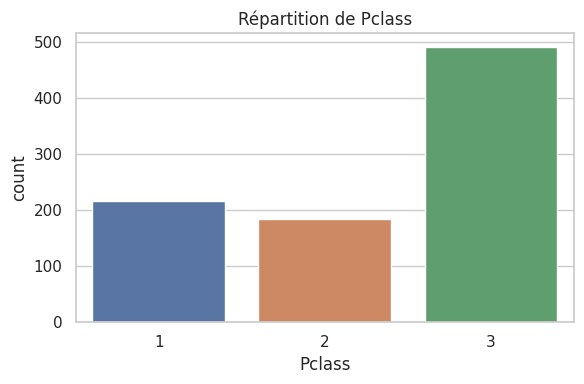

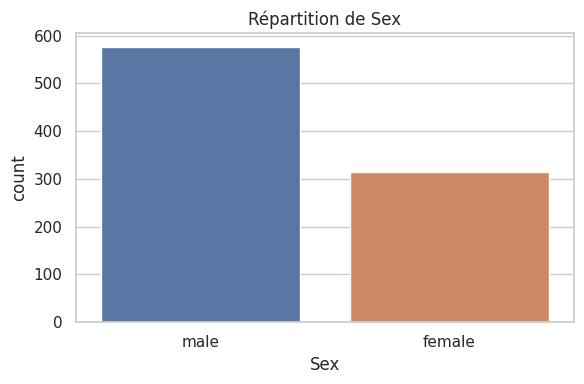

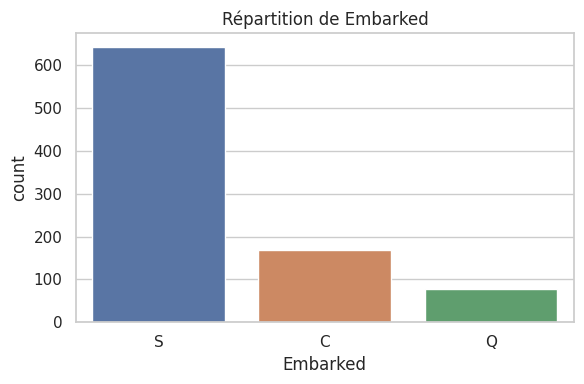

In [23]:
# Variables numériques
num_cols = ["Age", "SibSp", "Parch", "Fare"]
print(df[num_cols].describe())

# Variables catégorielles
cat_cols = ["Survived", "Pclass", "Sex", "Embarked", "Cabin"]
for col in cat_cols:
    print(f"\nFréquences pour {col}:")
    print(df[col].value_counts(dropna=False))
    print(df[col].value_counts(normalize=True, dropna=False).round(3))

# Histogrammes numériques
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.tight_layout()
    plt.show()

# Barplots catégoriels
for col in ["Survived", "Pclass", "Sex", "Embarked"]:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Répartition de {col}")
    plt.tight_layout()
    plt.show()


4. Analyse de la cible Survived
Explication
print("Fréquences de Survived :") : message d’introduction.

print(df["Survived"].value_counts()) : effectifs de 0 et 1.

print(df["Survived"].value_counts(normalize=True).round(3)) : proportions (taux de survie et de non-survie).

plt.figure(figsize=(5,4)) : nouvelle figure.

sns.countplot(data=df, x="Survived") : barplot du nombre de passagers morts/vivants.

plt.title("Répartition de la survie (0 = non, 1 = oui)") : titre explicatif.

plt.tight_layout() et plt.show() : mise en page + affichage.​

Fréquences de Survived :
Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616
1    0.384
Name: proportion, dtype: float64


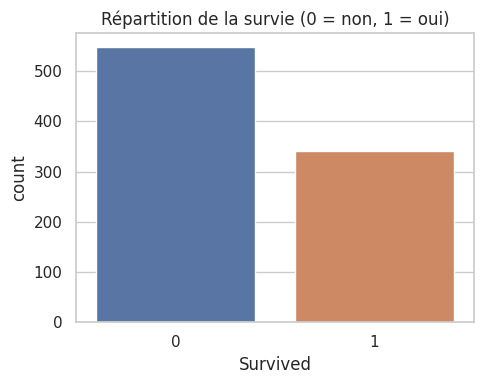

In [24]:
print("Fréquences de Survived :")
print(df["Survived"].value_counts())
print(df["Survived"].value_counts(normalize=True).round(3))

plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Survived")
plt.title("Répartition de la survie (0 = non, 1 = oui)")
plt.tight_layout()
plt.show()


5. Bivarié : Survived vs catégorielles
6. Explication
def crosstab_with_percent(df, row, col="Survived"): : définit une fonction pour construire une table croisée avec les pourcentages.

ct = pd.crosstab(df[row], df[col]) : construit une table de contingence (effectifs).

ct_pct = ct.div(ct.sum(axis=1), axis=0).round(3) : divise chaque ligne par sa somme pour obtenir des pourcentages par modalité de row.

return ct, ct_pct : renvoie la table brute et la table en pourcentages.

for col in ["Sex", "Pclass", "Embarked"]: : boucle sur les variables qualitatives d’intérêt.

ct, ct_pct = crosstab_with_percent(df, col) : calcule les tables Survived × col.

print("Effectifs :\n", ct) : affiche les effectifs.

print("Pourcentages par ligne :\n", ct_pct) : affiche les taux de survie/non-survie par modalité.

sns.countplot(data=df, x=col, hue="Survived") : barplot avec x = col et couleurs (hue) = Survived (0/1).

plt.title(f"Survie selon {col}") : titre pour ce croisement.

df["CabinKnown"] = df["Cabin"].notna().astype(int) : crée une nouvelle colonne qui vaut 1 si la cabine est connue (non NaN), sinon 0.

Le reste répète le même schéma (table + barplot) pour cette nouvelle variable.


Survived vs Sex
Effectifs :
 Survived    0    1
Sex               
female     81  233
male      468  109
Pourcentages par ligne :
 Survived      0      1
Sex                   
female    0.258  0.742
male      0.811  0.189


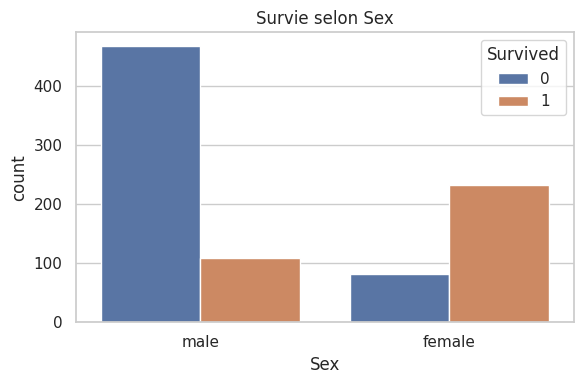


Survived vs Pclass
Effectifs :
 Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Pourcentages par ligne :
 Survived      0      1
Pclass                
1         0.370  0.630
2         0.527  0.473
3         0.758  0.242


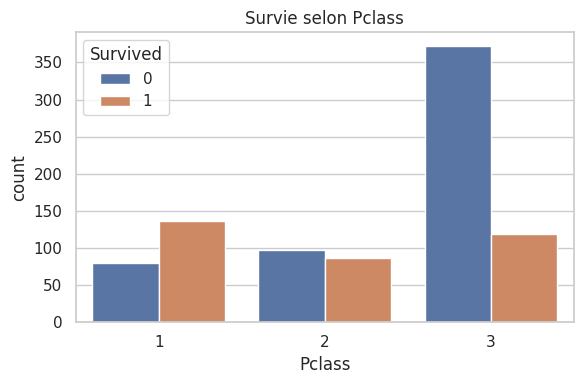


Survived vs Embarked
Effectifs :
 Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217
Pourcentages par ligne :
 Survived      0      1
Embarked              
C         0.446  0.554
Q         0.610  0.390
S         0.663  0.337


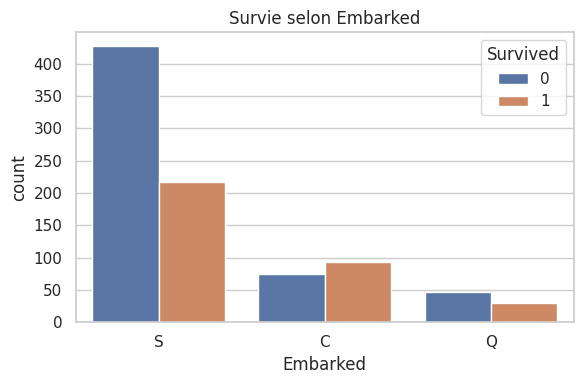


Survived vs CabinKnown
Effectifs :
 Survived      0    1
CabinKnown          
0           481  206
1            68  136
Pourcentages par ligne :
 Survived        0      1
CabinKnown              
0           0.700  0.300
1           0.333  0.667


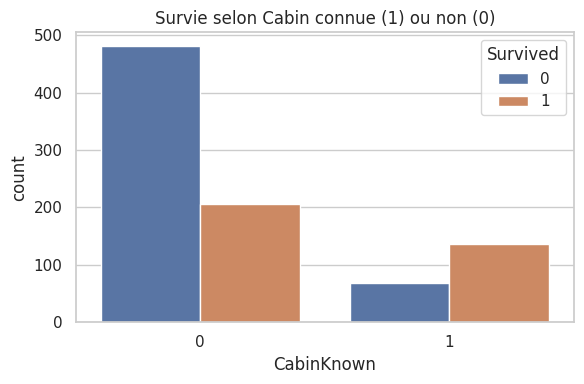

In [25]:
# Fonction utilitaire pour crosstab + pourcentages
def crosstab_with_percent(df, row, col="Survived"):
    ct = pd.crosstab(df[row], df[col])
    ct_pct = ct.div(ct.sum(axis=1), axis=0).round(3)
    return ct, ct_pct

for col in ["Sex", "Pclass", "Embarked"]:
    print(f"\nSurvived vs {col}")
    ct, ct_pct = crosstab_with_percent(df, col)
    print("Effectifs :\n", ct)
    print("Pourcentages par ligne :\n", ct_pct)

    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Survived")
    plt.title(f"Survie selon {col}")
    plt.tight_layout()
    plt.show()

# Cabin connue ou non
df["CabinKnown"] = df["Cabin"].notna().astype(int)
print("\nSurvived vs CabinKnown")
ct, ct_pct = crosstab_with_percent(df, "CabinKnown")
print("Effectifs :\n", ct)
print("Pourcentages par ligne :\n", ct_pct)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="CabinKnown", hue="Survived")
plt.title("Survie selon Cabin connue (1) ou non (0)")
plt.tight_layout()
plt.show()


6. Bivarié : Survived vs numériques
7. Explication
for col in ["Age", "Fare"]: : boucle sur les deux variables numériques principales.

sns.boxplot(data=df, x="Survived", y=col) : boxplot de la variable numérique col selon la variable Survived (0/1).

plt.title(f"{col} selon la survie") : titre indiquant que l’on compare la distribution par survie.

sns.histplot(..., hue="Survived", kde=True, element="step", stat="density", common_norm=False) :

histogramme de col avec couleur différente pour Survived 0/1,

kde=True ajoute une courbe de densité,

stat="density" normalise les hauteurs,

common_norm=False évite de normaliser sur l’ensemble des deux groupes.

df.groupby("Survived")[col].describe() : calcule les stats descriptives de col séparément pour les groupes Survived = 0 et 1.

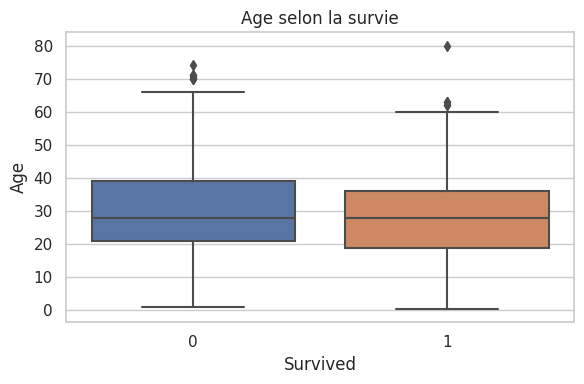

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

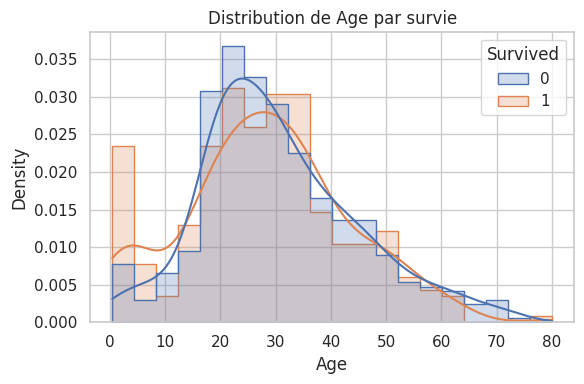


Stats de Age par Survived
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


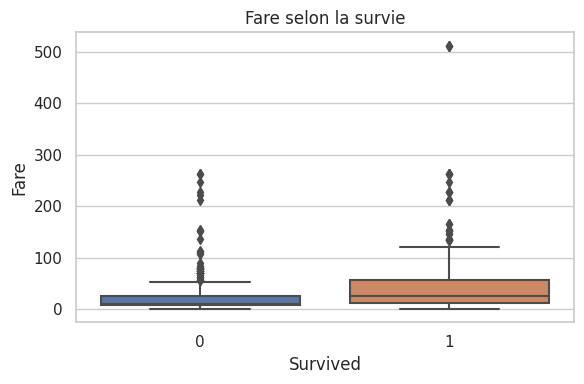

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

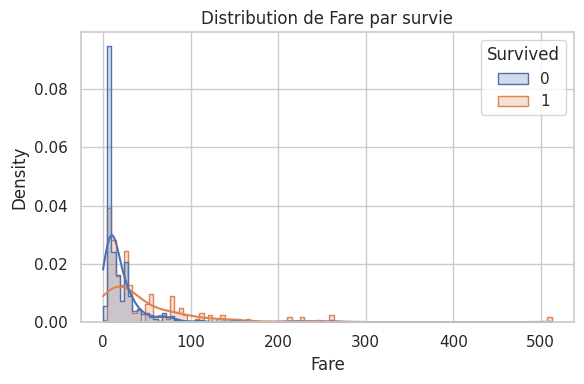


Stats de Fare par Survived
          count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


In [26]:
for col in ["Age", "Fare"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="Survived", y=col)
    plt.title(f"{col} selon la survie")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="Survived", kde=True, element="step", stat="density", common_norm=False)
    plt.title(f"Distribution de {col} par survie")
    plt.tight_layout()
    plt.show()

    print(f"\nStats de {col} par Survived")
    print(df.groupby("Survived")[col].describe())


7. Variables dérivées
8. Explication
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1 : taille de la famille = frères/sœurs + parents/enfants + la personne elle-même.

df["IsAlone"] = (df["FamilySize"] == 1).astype(int) : variable binaire qui vaut 1 si la personne voyage seule.

def family_category(size): ... : fonction qui catégorise la taille de la famille :

1 → "Single"

2–4 → "Small"

4 → "Large"

df["FamilyCat"] = df["FamilySize"].apply(family_category) : applique cette fonction à chaque valeur de FamilySize.

df["Title"] = df["Name"].str.extract(r",\s*([^.]*)\.", expand=False).str.strip() :

utilise une expression régulière pour extraire le titre entre la virgule et le point dans le nom (ex. "Mr", "Mrs", "Miss", etc.),

str.strip() enlève les espaces autour.

for col in ["FamilySize", "FamilyCat", "IsAlone", "Title"]: : boucle sur les nouvelles variables.

ct, ct_pct = crosstab_with_percent(df, col) : calcule effectifs et pourcentages de survie par modalité.

sns.countplot(data=df, x=col, hue="Survived") : barplot montrant la survie en fonction de chaque modalité.

plt.xticks(rotation=45) : fait pivoter les labels s’ils sont longs (par ex. les titres).

sns.histplot(df["FamilySize"], bins=10, kde=False) : histogramme de la taille de la famille.​




Survived vs FamilySize
Effectifs :
 Survived      0    1
FamilySize          
1           374  163
2            72   89
3            43   59
4             8   21
5            12    3
6            19    3
7             8    4
8             6    0
11            7    0
Pourcentages par ligne :
 Survived        0      1
FamilySize              
1           0.696  0.304
2           0.447  0.553
3           0.422  0.578
4           0.276  0.724
5           0.800  0.200
6           0.864  0.136
7           0.667  0.333
8           1.000  0.000
11          1.000  0.000


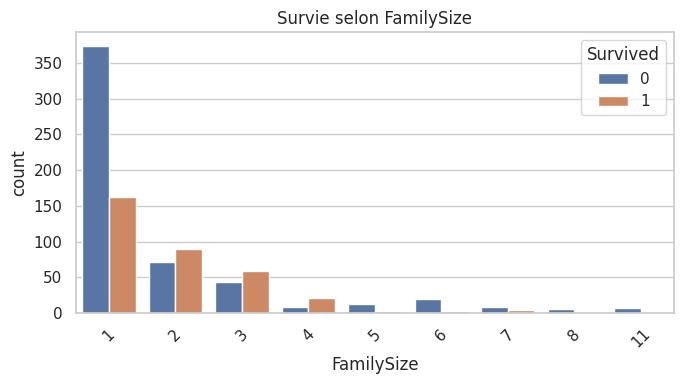


Survived vs FamilyCat
Effectifs :
 Survived     0    1
FamilyCat          
Large       52   10
Single     374  163
Small      123  169
Pourcentages par ligne :
 Survived       0      1
FamilyCat              
Large      0.839  0.161
Single     0.696  0.304
Small      0.421  0.579


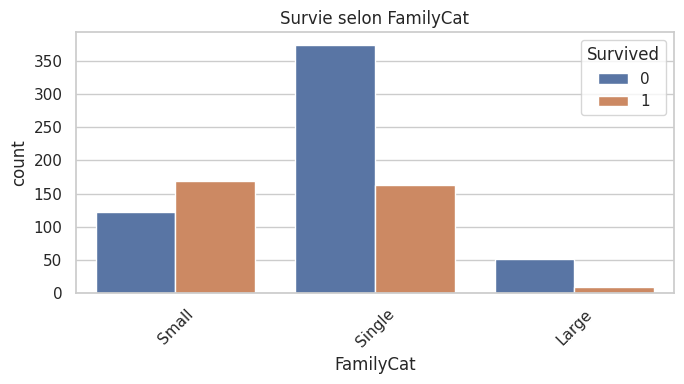


Survived vs IsAlone
Effectifs :
 Survived    0    1
IsAlone           
0         175  179
1         374  163
Pourcentages par ligne :
 Survived      0      1
IsAlone               
0         0.494  0.506
1         0.696  0.304


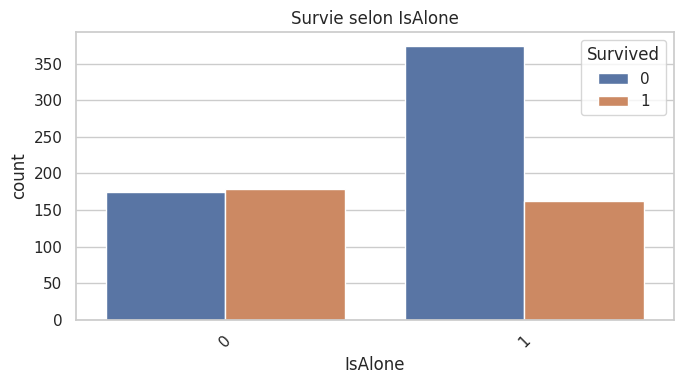


Survived vs Title
Effectifs :
 Survived        0    1
Title                 
Capt            1    0
Col             1    1
Don             1    0
Dr              4    3
Jonkheer        1    0
Lady            0    1
Major           1    1
Master         17   23
Miss           55  127
Mlle            0    2
Mme             0    1
Mr            436   81
Mrs            26   99
Ms              0    1
Rev             6    0
Sir             0    1
the Countess    0    1
Pourcentages par ligne :
 Survived          0      1
Title                     
Capt          1.000  0.000
Col           0.500  0.500
Don           1.000  0.000
Dr            0.571  0.429
Jonkheer      1.000  0.000
Lady          0.000  1.000
Major         0.500  0.500
Master        0.425  0.575
Miss          0.302  0.698
Mlle          0.000  1.000
Mme           0.000  1.000
Mr            0.843  0.157
Mrs           0.208  0.792
Ms            0.000  1.000
Rev           1.000  0.000
Sir           0.000  1.000
the Countess  0.000

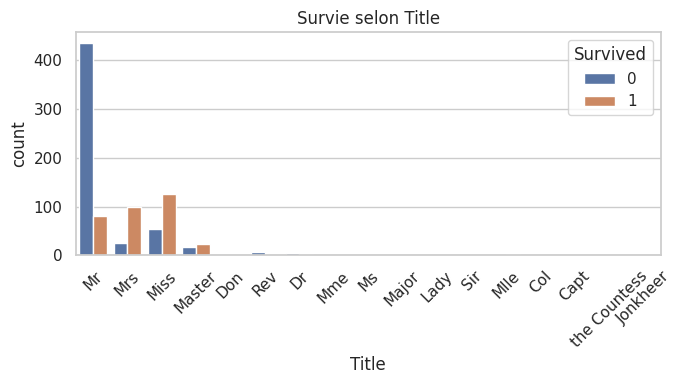

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


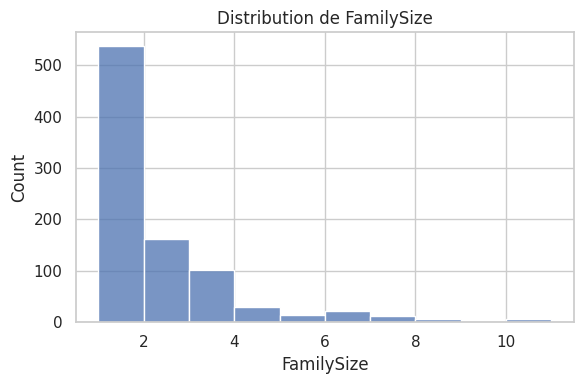

In [27]:
# FamilySize et IsAlone
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

# Catégorie FamilySize (optionnelle)
def family_category(size):
    if size == 1:
        return "Single"
    elif 2 <= size <= 4:
        return "Small"
    else:
        return "Large"

df["FamilyCat"] = df["FamilySize"].apply(family_category)

# Extraction du titre
df["Title"] = df["Name"].str.extract(r",\s*([^.]*)\.", expand=False).str.strip()

for col in ["FamilySize", "FamilyCat", "IsAlone", "Title"]:
    print(f"\nSurvived vs {col}")
    if df[col].dtype == "O":
        ct, ct_pct = crosstab_with_percent(df, col)
        print("Effectifs :\n", ct)
        print("Pourcentages par ligne :\n", ct_pct)
    else:
        ct, ct_pct = crosstab_with_percent(df, col)
        print("Effectifs :\n", ct)
        print("Pourcentages par ligne :\n", ct_pct)

    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue="Survived")
    plt.title(f"Survie selon {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Histogramme FamilySize
plt.figure(figsize=(6,4))
sns.histplot(df["FamilySize"], bins=10, kde=False)
plt.title("Distribution de FamilySize")
plt.tight_layout()
plt.show()


8. Corrélations numériques
9. Explication
num_for_corr = ["Age", "SibSp", "Parch", "Fare", "FamilySize"] : liste des variables numériques à corréler.

corr = df[num_for_corr].corr() : calcule la matrice de corrélation de Pearson entre ces variables.

print(corr) : affiche la matrice (valeurs entre -1 et 1).

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f") :

affiche la matrice de corrélation sous forme de carte de chaleur,

annot=True écrit les valeurs dans chaque case,

cmap="coolwarm" colore en bleu/rouge selon la force du lien,

fmt=".2f" formate avec 2 décimales.​

                 Age     SibSp     Parch      Fare  FamilySize
Age         1.000000 -0.308247 -0.189119  0.096067   -0.301914
SibSp      -0.308247  1.000000  0.414838  0.159651    0.890712
Parch      -0.189119  0.414838  1.000000  0.216225    0.783111
Fare        0.096067  0.159651  0.216225  1.000000    0.217138
FamilySize -0.301914  0.890712  0.783111  0.217138    1.000000


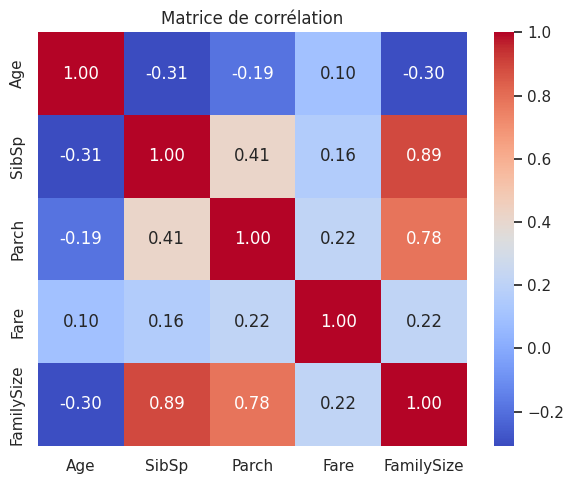

In [28]:
num_for_corr = ["Age", "SibSp", "Parch", "Fare", "FamilySize"]
corr = df[num_for_corr].corr()
print(corr)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()


9. Multivarié simple
10. Explication
sns.catplot(..., x="Pclass", hue="Sex", col="Survived", kind="count") :

crée des graphiques de comptage (kind="count") de Pclass,

hue="Sex" colore selon le sexe,

col="Survived" crée une colonne de graphes pour Survived = 0 et une pour 1.

plt.subplots_adjust(top=0.8) : libère un peu d’espace en haut pour le titre global.

plt.suptitle("Survie selon classe et sexe") : titre global pour l’ensemble des sous-graphiques.

Le deuxième catplot fait la même chose mais avec hue="Embarked" pour le port d’embarquement.

ct = pd.crosstab([df["Pclass"], df["Sex"]], df["Survived"]) : table de contingence à deux variables en ligne (Pclass, Sex) et Survived en colonnes.

ct_pct = ct.div(ct.sum(axis=1), axis=0).round(3) : calcule le taux de survie par combinaison (Pclass, Sex).

print(...) : affiche effectifs et taux.​

10. Outliers
python
# Boxplots numériques
plt.figure(figsize=(8,4))
sns.boxplot(data=df[["Age", "Fare", "SibSp", "Parch"]])
plt.title("Boxplots des variables numériques")
plt.tight_layout()
plt.show()

# Focus sur Fare (log)
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(df["Fare"]), kde=True)
plt.title("Distribution de log(1 + Fare)")
plt.tight_layout()
plt.show()

# Vérification âges extrêmes
print("\nÂges min et max :")
print(df["Age"].min(), df["Age"].max())
Explication
sns.boxplot(data=df[["Age", "Fare", "SibSp", "Parch"]]) : trace des boxplots pour plusieurs variables numériques en même temps pour voir les outliers (valeurs extrêmes).

sns.histplot(np.log1p(df["Fare"]), kde=True) : histogramme du log-transformé de Fare (log(1 + Fare)), ce qui réduit l’effet des très grandes valeurs.

print(df["Age"].min(), df["Age"].max()) : affiche l’âge minimum et maximum pour vérifier les valeurs atypiques.​

Si tu veux, tu peux demander ensuite :

soit une version commentée directement dans un notebook (avec des cellules séparées),

soit un focus sur une partie précise (corrélations, création de variables, etc.) pour aller plus en détail.





/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x400 with 0 Axes>

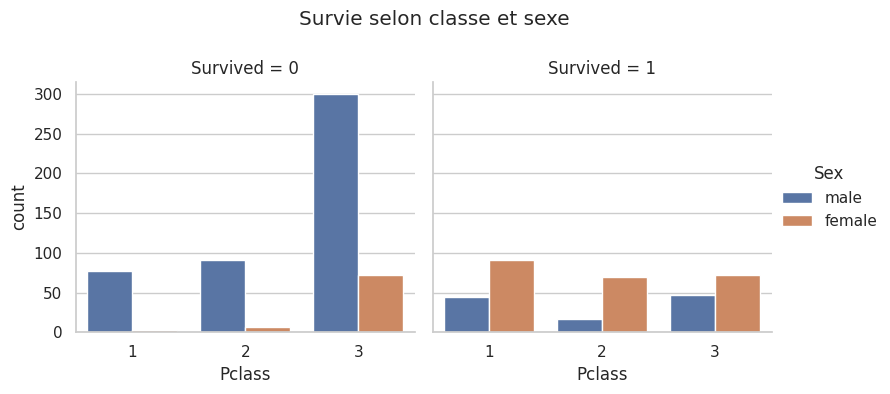

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x400 with 0 Axes>

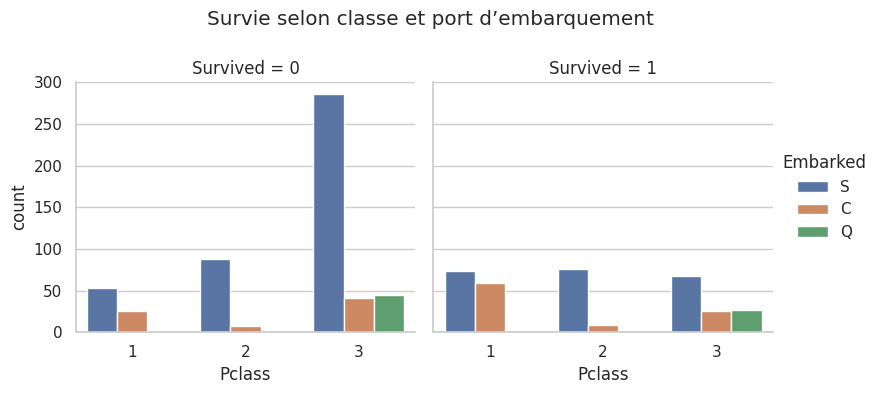


Pclass x Sex vs Survived (effectifs) :
 Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

Pclass x Sex vs Survived (taux) :
 Survived           0      1
Pclass Sex                 
1      female  0.032  0.968
       male    0.631  0.369
2      female  0.079  0.921
       male    0.843  0.157
3      female  0.500  0.500
       male    0.865  0.135


In [29]:
# Survived vs Sex & Pclass
plt.figure(figsize=(7,4))
sns.catplot(data=df, x="Pclass", hue="Sex", col="Survived",
            kind="count", height=4, aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle("Survie selon classe et sexe")
plt.show()

# Survived vs Pclass & Embarked
plt.figure(figsize=(7,4))
sns.catplot(data=df, x="Pclass", hue="Embarked", col="Survived",
            kind="count", height=4, aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle("Survie selon classe et port d’embarquement")
plt.show()

# Tableau Pclass x Sex avec taux de survie
ct = pd.crosstab([df["Pclass"], df["Sex"]], df["Survived"])
ct_pct = ct.div(ct.sum(axis=1), axis=0).round(3)
print("\nPclass x Sex vs Survived (effectifs) :\n", ct)
print("\nPclass x Sex vs Survived (taux) :\n", ct_pct)


10. Outliers
11. Explication
sns.boxplot(data=df[["Age", "Fare", "SibSp", "Parch"]]) : trace des boxplots pour plusieurs variables numériques en même temps pour voir les outliers (valeurs extrêmes).

sns.histplot(np.log1p(df["Fare"]), kde=True) : histogramme du log-transformé de Fare (log(1 + Fare)), ce qui réduit l’effet des très grandes valeurs.

print(df["Age"].min(), df["Age"].max()) : affiche l’âge minimum et maximum pour vérifier les valeurs atypiques.​

Si tu veux, tu peux demander ensuite :

soit une version commentée directement dans un notebook (avec des cellules séparées),

soit un focus sur une partie précise (corrélations, création de variables, etc.) pour aller plus en détail.

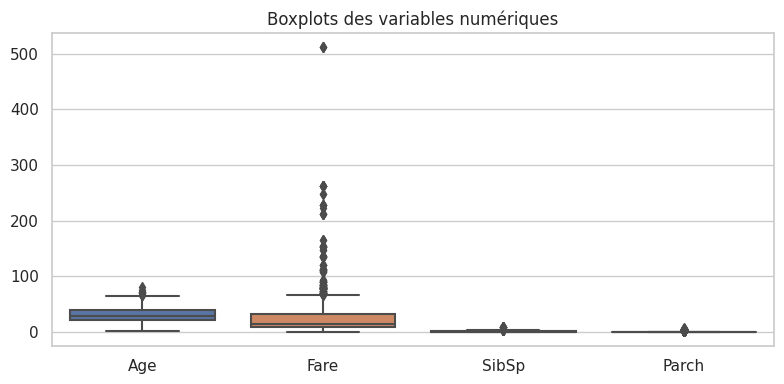

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


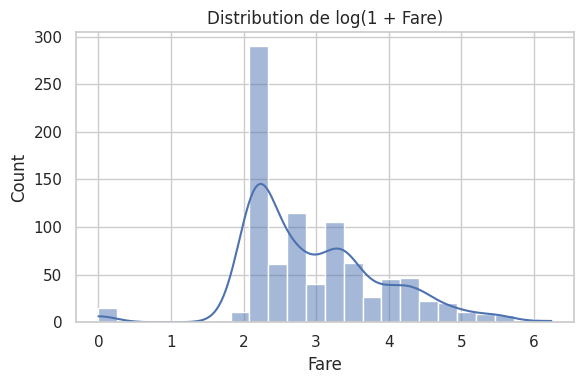


Âges min et max :
0.42 80.0


In [30]:
# Boxplots numériques
plt.figure(figsize=(8,4))
sns.boxplot(data=df[["Age", "Fare", "SibSp", "Parch"]])
plt.title("Boxplots des variables numériques")
plt.tight_layout()
plt.show()

# Focus sur Fare (log)
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(df["Fare"]), kde=True)
plt.title("Distribution de log(1 + Fare)")
plt.tight_layout()
plt.show()

# Vérification âges extrêmes
print("\nÂges min et max :")
print(df["Age"].min(), df["Age"].max())


2. Gestion des valeurs manquantes

In [31]:
# Age : imputation par la médiane (plus robuste que la moyenne face aux outliers)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Embarked : imputation par le mode (valeur la plus fréquente)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Cabin : trop de valeurs manquantes → création d’une variable binaire CabinKnown
df['CabinKnown'] = df['Cabin'].notnull().astype(int)

# 3. Traitement des outliers

In [33]:
# Fare : transformation logarithmique pour réduire l’impact des valeurs extrêmes
df['Fare'] = df['Fare'].apply(lambda x: np.log(x+1))

# 4. Feature engineering

In [34]:
# FamilySize = nombre de proches à bord (SibSp + Parch + soi-même)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# IsAlone = indicateur si le passager voyage seul
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Extraction du titre depuis la colonne Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Regroupement des titres rares en une seule catégorie "Rare"
df['Title'] = df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr',
                                   'Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# 5. Encodage des variables catégorielles

In [35]:
# Sex : encodage binaire (male=0, female=1)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Embarked : encodage one-hot
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

# Title : encodage one-hot
df = pd.get_dummies(df, columns=['Title'], prefix='Title')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# 6. Suppression des colonnes inutiles

In [36]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

# 7. Normalisation des variables continues

In [37]:
scaler = StandardScaler()
df[['Age','Fare','FamilySize']] = scaler.fit_transform(df[['Age','Fare','FamilySize']])

# 8. Vérification finale

In [38]:
print(df.head())   # Affiche les premières lignes du dataset nettoyé
print(df.shape)    # Dimensions du dataset final

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  CabinKnown  \
0         0       3    1 -0.565736      1      0 -0.768012           0   
1         1       1    0  0.663861      1      0  1.177089           1   
2         1       3    0 -0.258337      0      0 -0.676255           0   
3         1       1    0  0.433312      1      0  0.969715           1   
4         0       3    1  0.433312      0      0 -0.660263           0   

   FamilySize  IsAlone FamilyCat  Embarked_C  Embarked_Q  Embarked_S  \
0    0.059160        0     Small       False       False        True   
1    0.059160        0     Small        True       False       False   
2   -0.560975        1    Single       False       False        True   
3    0.059160        0     Small       False       False        True   
4   -0.560975        1    Single       False       False        True   

   Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0         False       False      True      False       Fals

# 2. Chargement du dataset pour le test

In [39]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")    # dataset de test nettoyé

# 3. Séparation features / target

In [42]:
X_train = df.drop("Survived", axis=1)   # Variables explicatives
y_train = df["Survived"]                # Variable cible

# 4. entrainement du model et Prédictions sur le test.csv

In [55]:
from sklearn.impute import SimpleImputer

# Création de l'imputer
imputer = SimpleImputer(strategy="median")

# Fit sur les données d'entraînement
X_train = pd.get_dummies(df.drop("Survived", axis=1), drop_first=True)
y_train = df["Survived"]

X_test = pd.get_dummies(test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Fit l'imputer sur X_train
imputer.fit(X_train)

# Transformer train et test
X_train = imputer.transform(X_train)
X_test  = imputer.transform(X_test)

# Entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
predictions = model.predict(X_test)

# Sauvegarde des résultats
output = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})
output.to_csv("submission.csv", index=False)
print("✅ Fichier submission.csv créé avec succès")


✅ Fichier submission.csv créé avec succès


In [60]:
# 1. Supprimer les colonnes inutiles
train_clean = df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)
test_clean  = test.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)

# 2. Encodage des variables catégorielles
train_clean = pd.get_dummies(train_clean, drop_first=True)
test_clean  = pd.get_dummies(test_clean, drop_first=True)

# 3. Alignement des colonnes
test_clean = test_clean.reindex(columns=train_clean.drop("Survived", axis=1).columns, fill_value=0)

# 4. Séparation features / target
X = train_clean.drop("Survived", axis=1)
y = train_clean["Survived"]

# 5. Split train/validation
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Imputation des NaN
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_valid = imputer.transform(X_valid)

# 7. Entraînement du modèle
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Évaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_valid)
print("Accuracy :", accuracy_score(y_valid, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_valid, y_pred))
print("Rapport de classification :\n", classification_report(y_valid, y_pred))


Accuracy : 0.8156424581005587
Matrice de confusion :
 [[96 14]
 [19 50]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [62]:
d=pd.read_csv("/kaggle/working/submission.csv")

In [63]:
d

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
